In [1]:
from mnist import MNIST

mnist = MNIST('./data')
images, labels = mnist.load_training()

In [2]:
len(images), len(labels)

(60000, 60000)

In [3]:
len(images[0])

784

In [4]:
28 * 28

784

In [5]:
import numpy as np

images = np.array(images).astype('float32') / 255
labels = np.array(labels)

In [6]:
images.dtype, images.shape

(dtype('float32'), (60000, 784))

In [7]:
labels.dtype, labels.shape

(dtype('uint8'), (60000,))

In [8]:
images[:1000].shape

(1000, 784)

In [9]:
labels[:1000].shape

(1000,)

In [10]:
batch_size = 100

for i in range(10):
    offset = batch_size * i
    print(i, offset, images[offset:offset + batch_size].shape)

0 0 (100, 784)
1 100 (100, 784)
2 200 (100, 784)
3 300 (100, 784)
4 400 (100, 784)
5 500 (100, 784)
6 600 (100, 784)
7 700 (100, 784)
8 800 (100, 784)
9 900 (100, 784)


In [11]:
batch_count = images.shape[0] // batch_size
batch_count

600

In [12]:
def batch(data, index, batch_size):
    offset = batch_size * index
    return data[offset:offset + batch_size]

batch(images, 0, 2)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [13]:
images2d = images.reshape([-1, 28, 28])
images2d.shape

(60000, 28, 28)

5


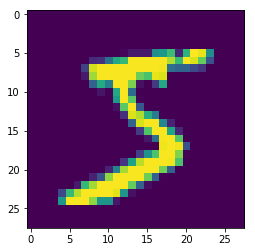

0


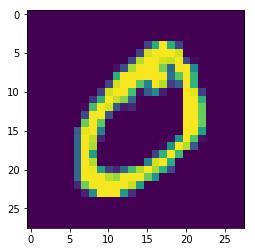

4


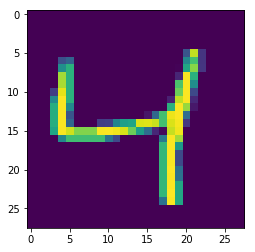

1


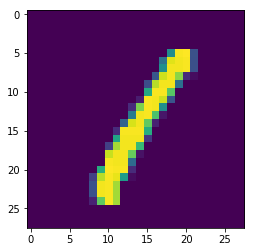

9


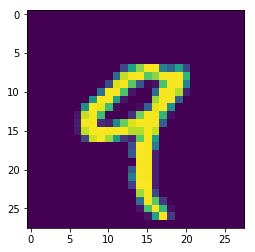

In [14]:
import matplotlib.pyplot as plt

for i in range(5):
    print(labels[i])
    plt.imshow(images2d[i])
    plt.show()

In [15]:
import tensorflow as tf

session = tf.Session()

In [16]:
x = tf.placeholder(tf.float32, [None, 28 * 28])
z = tf.placeholder(tf.int64, [None])

In [17]:
op = tf.reduce_sum(x)

for i in range(10):
    data = {
        x: batch(images, i, batch_size),
        z: batch(labels, i, batch_size)
    }
    print(i, session.run(op, feed_dict=data))

0 9925.03
1 9957.77
2 10110.8
3 9806.78
4 9662.6
5 9627.38
6 9849.09
7 10834.0
8 10549.4
9 10216.4


In [18]:
w = tf.Variable(tf.truncated_normal([28 * 28, 10]))
b = tf.Variable(tf.truncated_normal([10]))
y = tf.nn.softmax(tf.matmul(x, w) + b)

t = tf.one_hot(z, 10)

cross_entropy = -tf.reduce_sum(t * tf.log(y), axis=1)
loss = tf.reduce_mean(cross_entropy)

train = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

In [19]:
correct = tf.equal(tf.argmax(y, axis=1), z)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [20]:
session = tf.Session()
session.run(tf.global_variables_initializer())

test_data = {
    x: images[:1000],
    z: labels[:1000]
}

print(session.run(accuracy, feed_dict=test_data))

for i in range(200):
    data = {
        x: batch(images[1000:], i, batch_size),
        z: batch(labels[1000:], i, batch_size)
    }
    session.run(train, feed_dict=data)
    print(i + 1, session.run(accuracy, feed_dict=test_data))

0.078
1 0.091
2 0.119
3 0.112
4 0.121
5 0.147
6 0.167
7 0.201
8 0.2
9 0.228
10 0.248
11 0.265
12 0.306
13 0.319
14 0.343
15 0.387
16 0.395
17 0.412
18 0.418
19 0.415
20 0.443
21 0.442
22 0.458
23 0.476
24 0.484
25 0.5
26 0.504
27 0.516
28 0.535
29 0.53
30 0.535
31 0.535
32 0.549
33 0.558
34 0.569
35 0.563
36 0.577
37 0.57
38 0.587
39 0.596
40 0.607
41 0.604
42 0.608
43 0.609
44 0.615
45 0.613
46 0.627
47 0.627
48 0.642
49 0.644
50 0.64
51 0.638
52 0.636
53 0.627
54 0.616
55 0.634
56 0.635
57 0.639
58 0.64
59 0.654
60 0.654
61 0.67
62 0.668
63 0.677
64 0.679
65 0.679
66 0.667
67 0.681
68 0.688
69 0.69
70 0.69
71 0.696
72 0.691
73 0.712
74 0.7
75 0.709
76 0.705
77 0.689
78 0.697
79 0.684
80 0.698
81 0.7
82 0.7
83 0.704
84 0.699
85 0.718
86 0.718
87 0.724
88 0.719
89 0.722
90 0.723
91 0.723
92 0.728
93 0.723
94 0.728
95 0.726
96 0.731
97 0.732
98 0.729
99 0.736
100 0.742
101 0.738
102 0.738
103 0.745
104 0.744
105 0.742
106 0.738
107 0.739
108 0.741
109 0.734
110 0.751
111 0.751
112 0.743

9 2


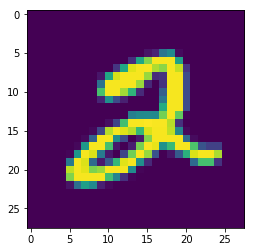

2 5


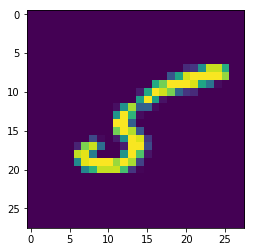

9 7


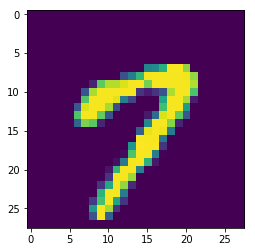

8 6


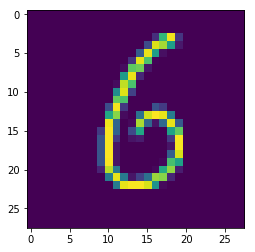

9 4


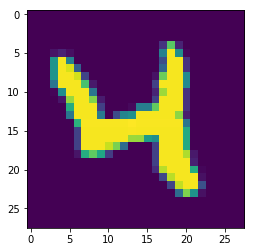

9 1


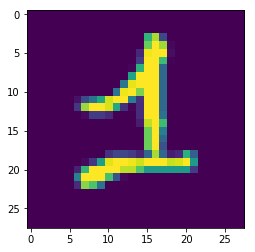

7 2


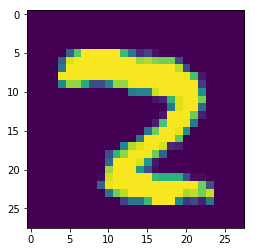

6 3


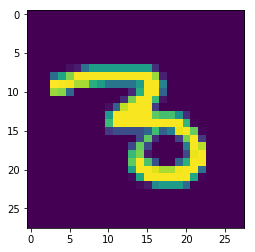

7 9


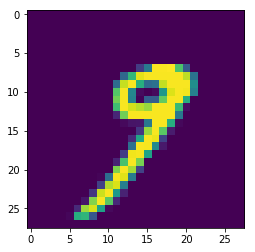

3 5


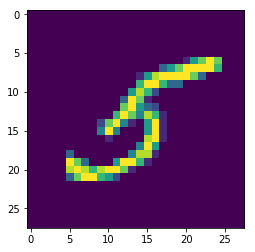

5 9


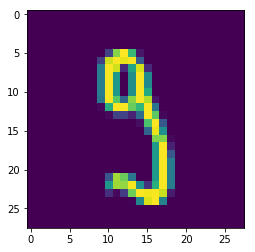

In [21]:
predictions = session.run(tf.argmax(y, axis=1), feed_dict=test_data)

for i in range(50):
    if predictions[i] != labels[i]:
        print(predictions[i], labels[i])
        plt.imshow(images2d[i])
        plt.show()